<a href="https://colab.research.google.com/github/alijawad480/IMBD-Sentiment-Analysis-NLP/blob/main/IMBD_Sentiment_Analysis_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/MovieReviewTrainingDatabase.csv')

In [5]:
df.head()

,sentiment,review
0,Positive,With all this stuff going down at the moment w...
1,Positive,'The Classic War of the Worlds' by Timothy Hin...
2,Negative,The film starts with a manager (Nicholas Bell)...
3,Negative,It must be assumed that those who praised this...
4,Positive,Superbly trashy and wondrously unpretentious 8...


In [6]:
df.shape

(25000, 2)

In [7]:
df.isnull().sum()

,0
sentiment,0
review,0


In [8]:
df['sentiment'].value_counts()

,count
sentiment,
Positive,12500
Negative,12500


In [9]:
print(df['sentiment'].unique())

['Positive' 'Negative']


In [10]:
df['sentiment']=df['sentiment'].str.strip().str.lower()

In [11]:
df['label']=df['sentiment'].map({'positive':1,'negative':0})

In [12]:
X = df['review']
y=df['label']

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [15]:
X_train_tfidf=tfidf.fit_transform(X_train)
X_test_tfidf=tfidf.transform(X_test)

In [16]:
from sklearn.svm import LinearSVC
svc=LinearSVC()

In [17]:
svc.fit(X_train_tfidf,y_train)

LinearSVC()

In [18]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [19]:
y_pred=svc.predict(X_test_tfidf)

In [20]:
print(accuracy_score(y_test,y_pred))

0.8954


In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      2481
           1       0.89      0.91      0.90      2519

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



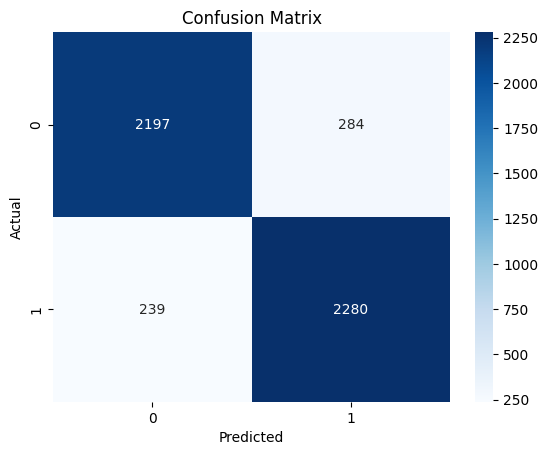

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
